In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.shape

(2240, 29)

In [9]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [13]:
#Data Cleaning

In [15]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst = True) #Change dtype to datetime

print('The oldest record:', min(data['Dt_Customer']).date())
print('The newest record:', max(data['Dt_Customer']).date())

The oldest record: 2012-07-30
The newest record: 2014-06-29


In [17]:
#Check every column
for col in data.columns:
    print(f"Value count for '{col}':")
    print(data[col].value_counts())
    print('_' * 50)

Value count for 'ID':
ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: count, Length: 2240, dtype: int64
__________________________________________________
Value count for 'Year_Birth':
Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64
__________________________________________________
Value c

In [19]:
#Birth changes to age
#Group Education, Marital_Status
#Income has nulls
#Group Kidhome and Teenhome
#Change suitable names

In [21]:
data['Age'] = 2015-data['Year_Birth']

data['Education'] = data['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Postgraduate', 'Basic': 'Undergraduate'})#Narrowing down to 3 groups
data['Marital_Status'] = data['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Single': 'Alone', 'Divorced': 'Alone', 'Widow': 'Alone', 'Absurd': 'Alone', 'YOLO': 'Alone'})
data['Having_Kids'] = data['Kidhome'] + data['Teenhome']
data['Is_Parent'] = data['Having_Kids'].apply(lambda x: 1 if x != 0 else 0)

#rename features
data.rename(columns = {'MntWines':'Wines', 'MntFruits':'Fruits', 'MntMeatProducts':'Meats', 'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets', 'MntGoldProds':'Golds'}, inplace=True)
data.rename(columns = {'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog', 'NumStorePurchases':'Store'}, inplace=True)

#Calculate total spending
data['Total_spent'] = data['Wines'] + data['Fruits']+ data['Meats']+ data['Fish']+ data['Sweets']+ data['Golds']

#breaking down the date to customer's enrollment
data['Day'] = data['Dt_Customer'].apply(lambda x: x.day)
data['Month'] = data['Dt_Customer'].apply(lambda x: x.month)
data['Year'] = data['Dt_Customer'].apply(lambda x: x.year)
data['Dayofweek'] = data['Dt_Customer'].apply(lambda x: x.day_name())

#drop unnecessary columns
data.dropna(inplace=True)
data.drop(['ID', 'Dt_Customer', 'Year_Birth', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

data_new = data.copy()

In [23]:
data_new.describe(include='all')

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meats,Fish,...,Complain,Response,Age,Having_Kids,Is_Parent,Total_spent,Day,Month,Year,Dayofweek
count,2216,2216,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216
unique,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
top,Graduate,Partner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
freq,1116,1430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336
mean,NaN,NaN,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.009477,0.150271,46.179603,0.947202,0.714350,607.075361,15.653430,6.465253,2013.028430,NaN
std,NaN,NaN,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.096907,0.357417,11.985554,0.749062,0.451825,602.900476,8.785475,3.489767,0.685618,NaN
min,NaN,NaN,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2012.000000,NaN
25%,NaN,NaN,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,38.000000,0.000000,0.000000,69.000000,8.000000,3.000000,2013.000000,NaN
50%,NaN,NaN,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,45.000000,1.000000,1.000000,396.500000,16.000000,6.000000,2013.000000,NaN
75%,NaN,NaN,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,56.000000,1.000000,1.000000,1048.000000,23.000000,10.000000,2013.000000,NaN


In [25]:
#Checking outliers using Boxplot visualizations

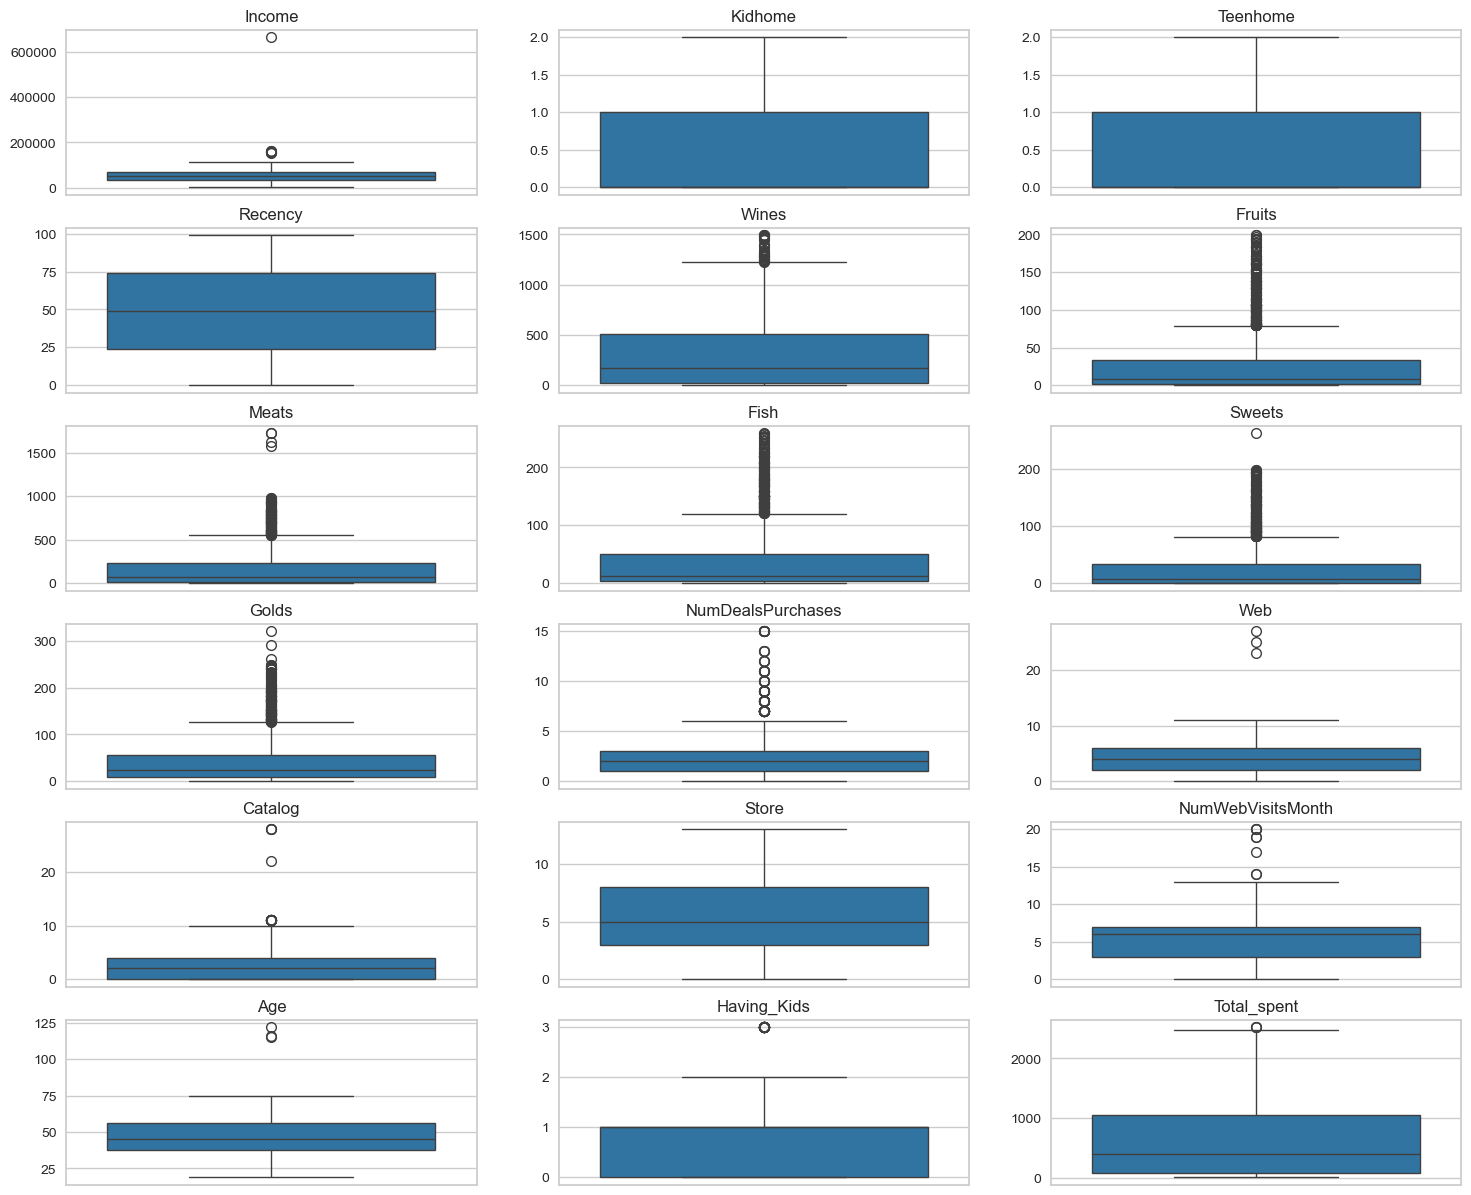

In [27]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18,15))
axes = axes.flatten()

#Only choose numeric and nonbinary values
data_numeric = data_new.select_dtypes(include=[np.number])
data_numeric = data_numeric.loc[:, data_numeric.nunique() > 2]

for i,col in enumerate(data_numeric.columns):
    if i<len(axes):
        sns.boxplot(data=data_new[col], ax=axes[i], color='#1f77b4')
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

plt.show()

In [28]:
#Check for outliers which do not make sense in Business context
print('Income')
print(data_new['Income'].sort_values().tail(5))

print('\nAge')
print(data_new['Age'].sort_values().tail(5))

Income
164     157243.0
1300    157733.0
687     160803.0
617     162397.0
2233    666666.0
Name: Income, dtype: float64

Age
424      74
1950     75
192     115
339     116
239     122
Name: Age, dtype: int64


In [29]:
#Remove outliers
data_new = data_new.drop(2233)
data_new = data_new[data_new['Age']<80]

In [30]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2212 non-null   object 
 1   Marital_Status     2212 non-null   object 
 2   Income             2212 non-null   float64
 3   Kidhome            2212 non-null   int64  
 4   Teenhome           2212 non-null   int64  
 5   Recency            2212 non-null   int64  
 6   Wines              2212 non-null   int64  
 7   Fruits             2212 non-null   int64  
 8   Meats              2212 non-null   int64  
 9   Fish               2212 non-null   int64  
 10  Sweets             2212 non-null   int64  
 11  Golds              2212 non-null   int64  
 12  NumDealsPurchases  2212 non-null   int64  
 13  Web                2212 non-null   int64  
 14  Catalog            2212 non-null   int64  
 15  Store              2212 non-null   int64  
 16  NumWebVisitsMonth  2212 non-n

In [35]:
#Visualizations

Text(0.5, 1.05, 'Feature Relationship')

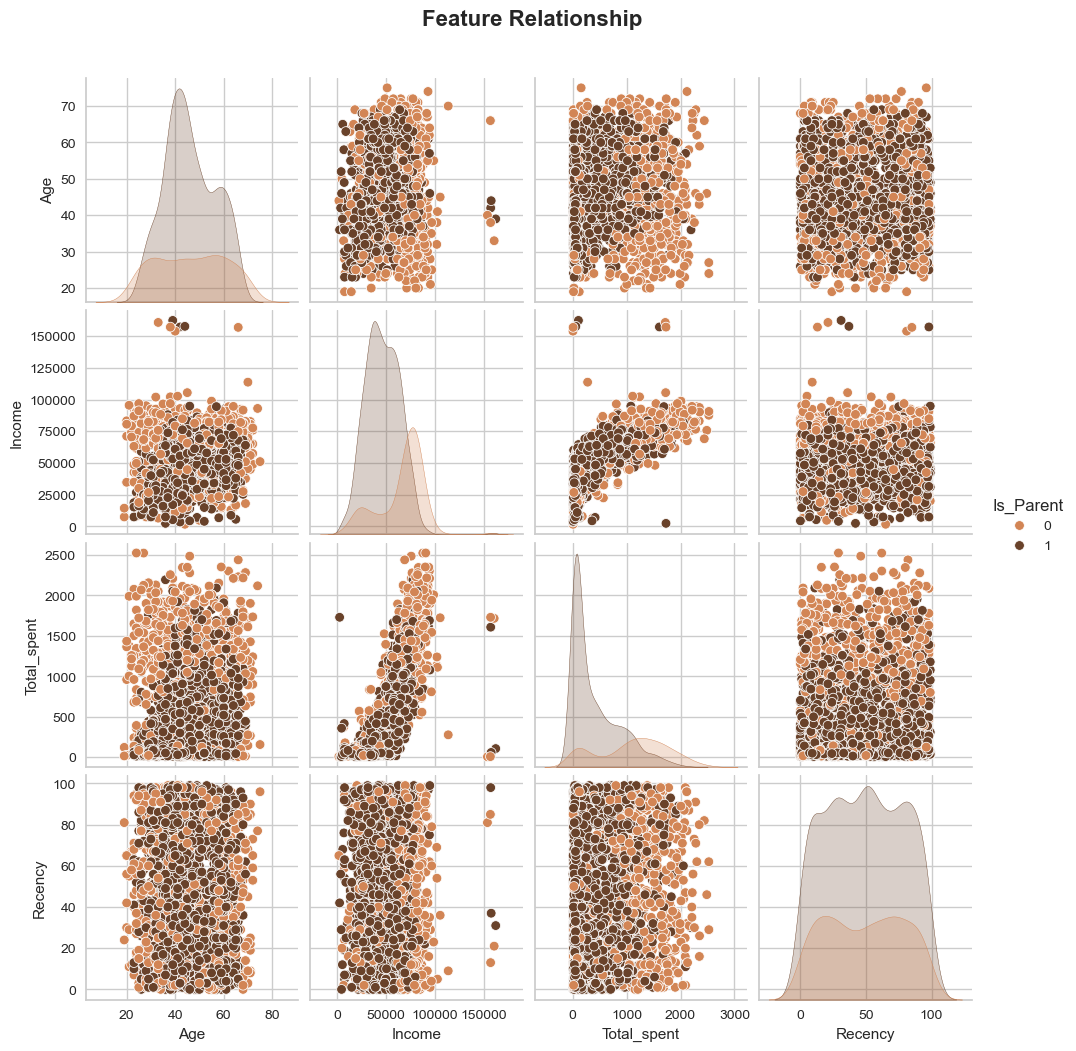

In [37]:
#Defining correlation between features 
sns.color_palette('copper_r')

data = ['Age', 'Income', 'Total_spent', 'Is_Parent', 'Recency']
plot = sns.pairplot(data_new[data], hue = 'Is_Parent', palette = 'copper_r')
plot.fig.suptitle('Feature Relationship', y=1.05, weight ='bold', fontsize=16)


<Axes: title={'center': 'Correlation Matrix'}>

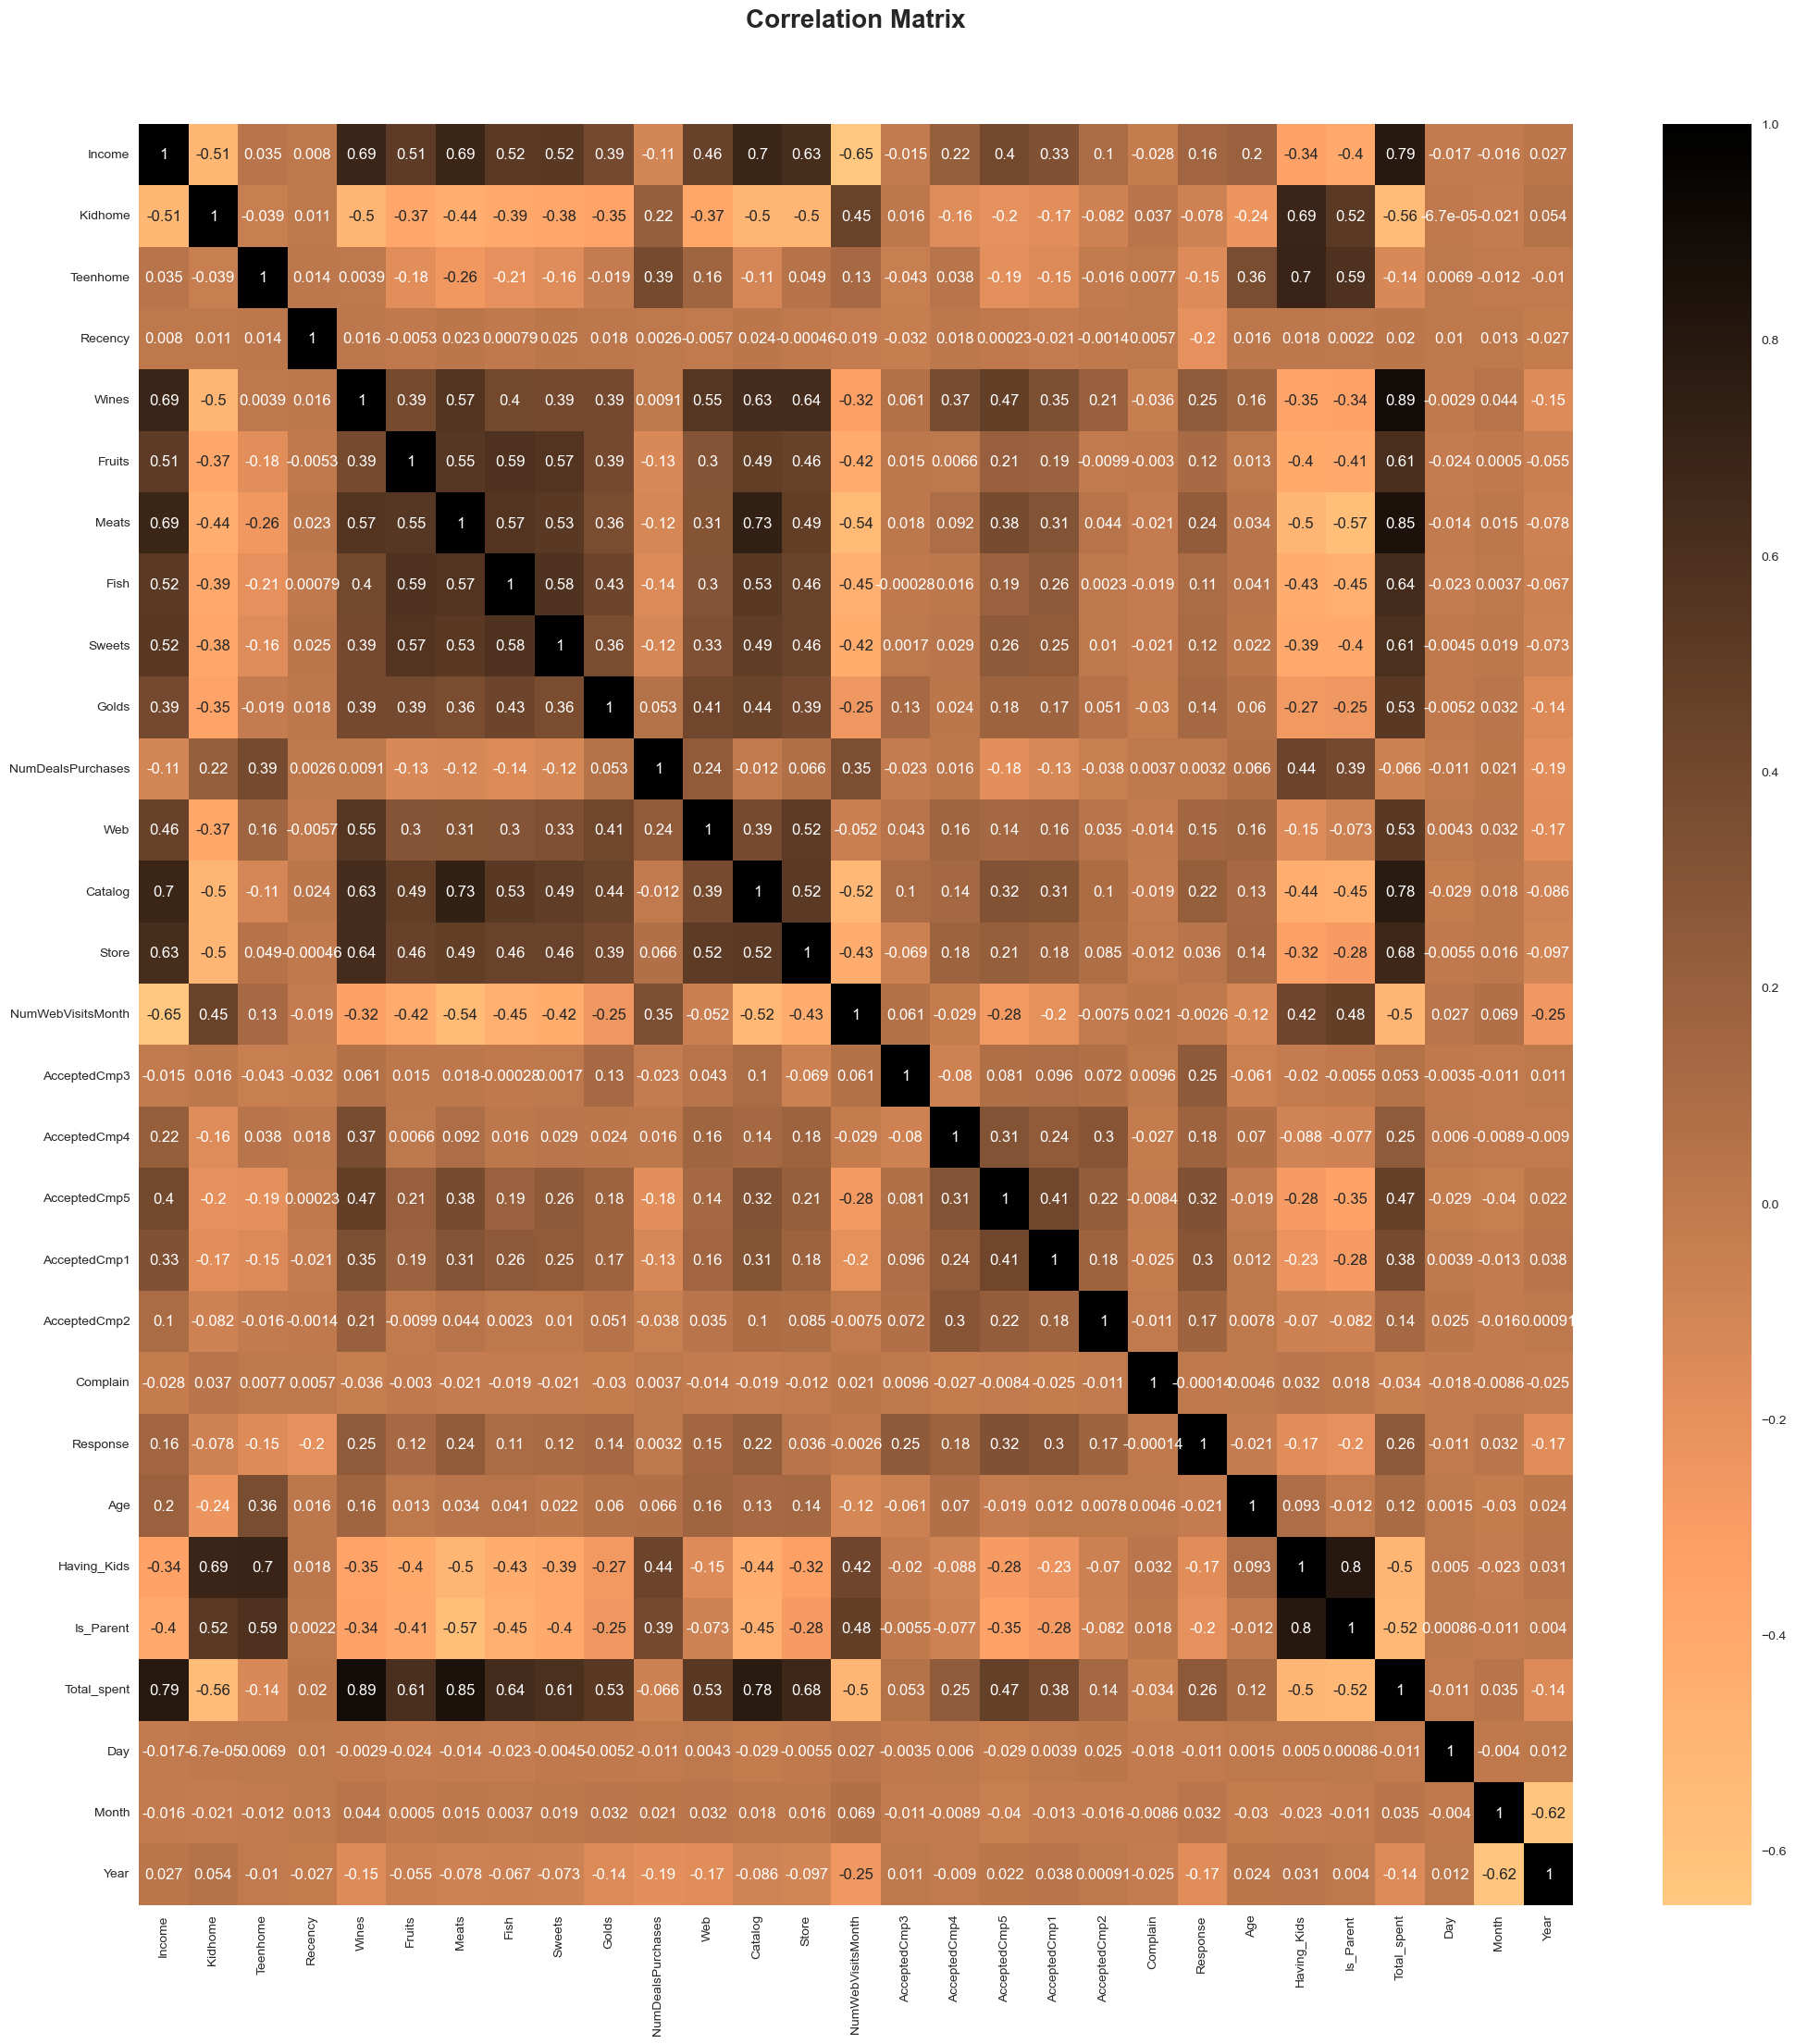

In [39]:
#Correlation matrix
data_numeric_new = data_new.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(25,25))
plt.title('Correlation Matrix', y=1.05, weight= 'bold', fontsize=20)
sns.heatmap(data_new[data_numeric_new].corr(), cmap='copper_r', annot=True)

In [41]:
#We need to answer business-related questions including:
# 1. Average spent on products by ages
# 2. Preferred channel to buy products
# 3. How do clients react to Mkt Campaigns
# 4. Which days or months of the year do clients have the tendency to go shopping
# 5. Average Complaints on Products 

In [43]:
# 1. Average spent on products by ages
group = pd.cut(data_new['Age'],[10,20,30,40,50,60,70,80])
group.value_counts()

Age
(40, 50]    669
(30, 40]    552
(50, 60]    459
(60, 70]    298
(20, 30]    212
(70, 80]     15
(10, 20]      7
Name: count, dtype: int64

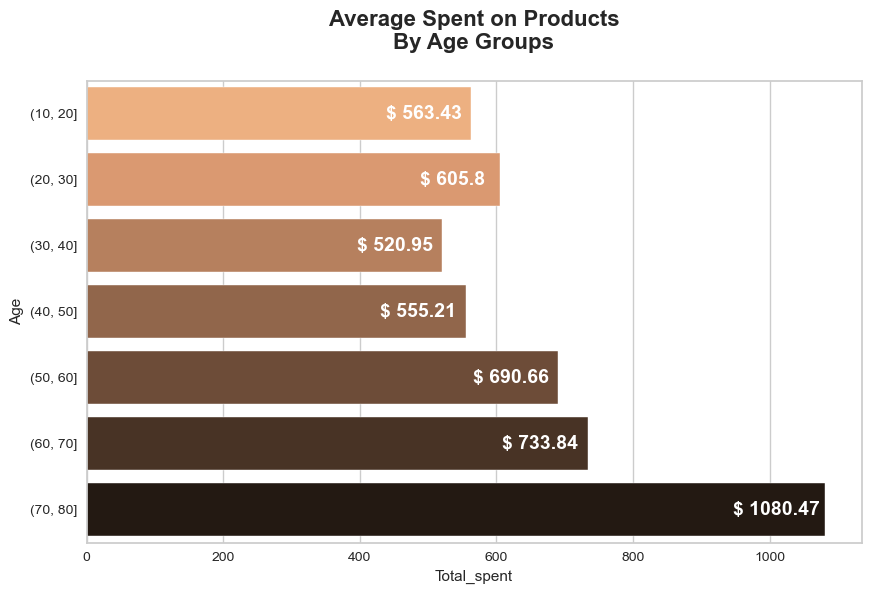

In [45]:
data2 = data_new.copy()
data2['Age'] = group

mean_group = data2[['Age', 'Total_spent']].groupby('Age').mean()

plt.figure(figsize=(10,6))
sns.barplot(x=data2['Total_spent'], y=data2['Age'], palette = 'copper_r', ci=None, orient='h')
plt.title('Average Spent on Products\nBy Age Groups', y=1.05, weight='bold', fontsize=16)

for i,v in enumerate(mean_group['Total_spent']):
    plt.text(v-70,i,'$ {}'.format(round(v,2)), horizontalalignment='center', verticalalignment='center', weight='bold', color='white', fontsize=14)

plt.show()

(0.0, 1.0, 0.0, 1.0)

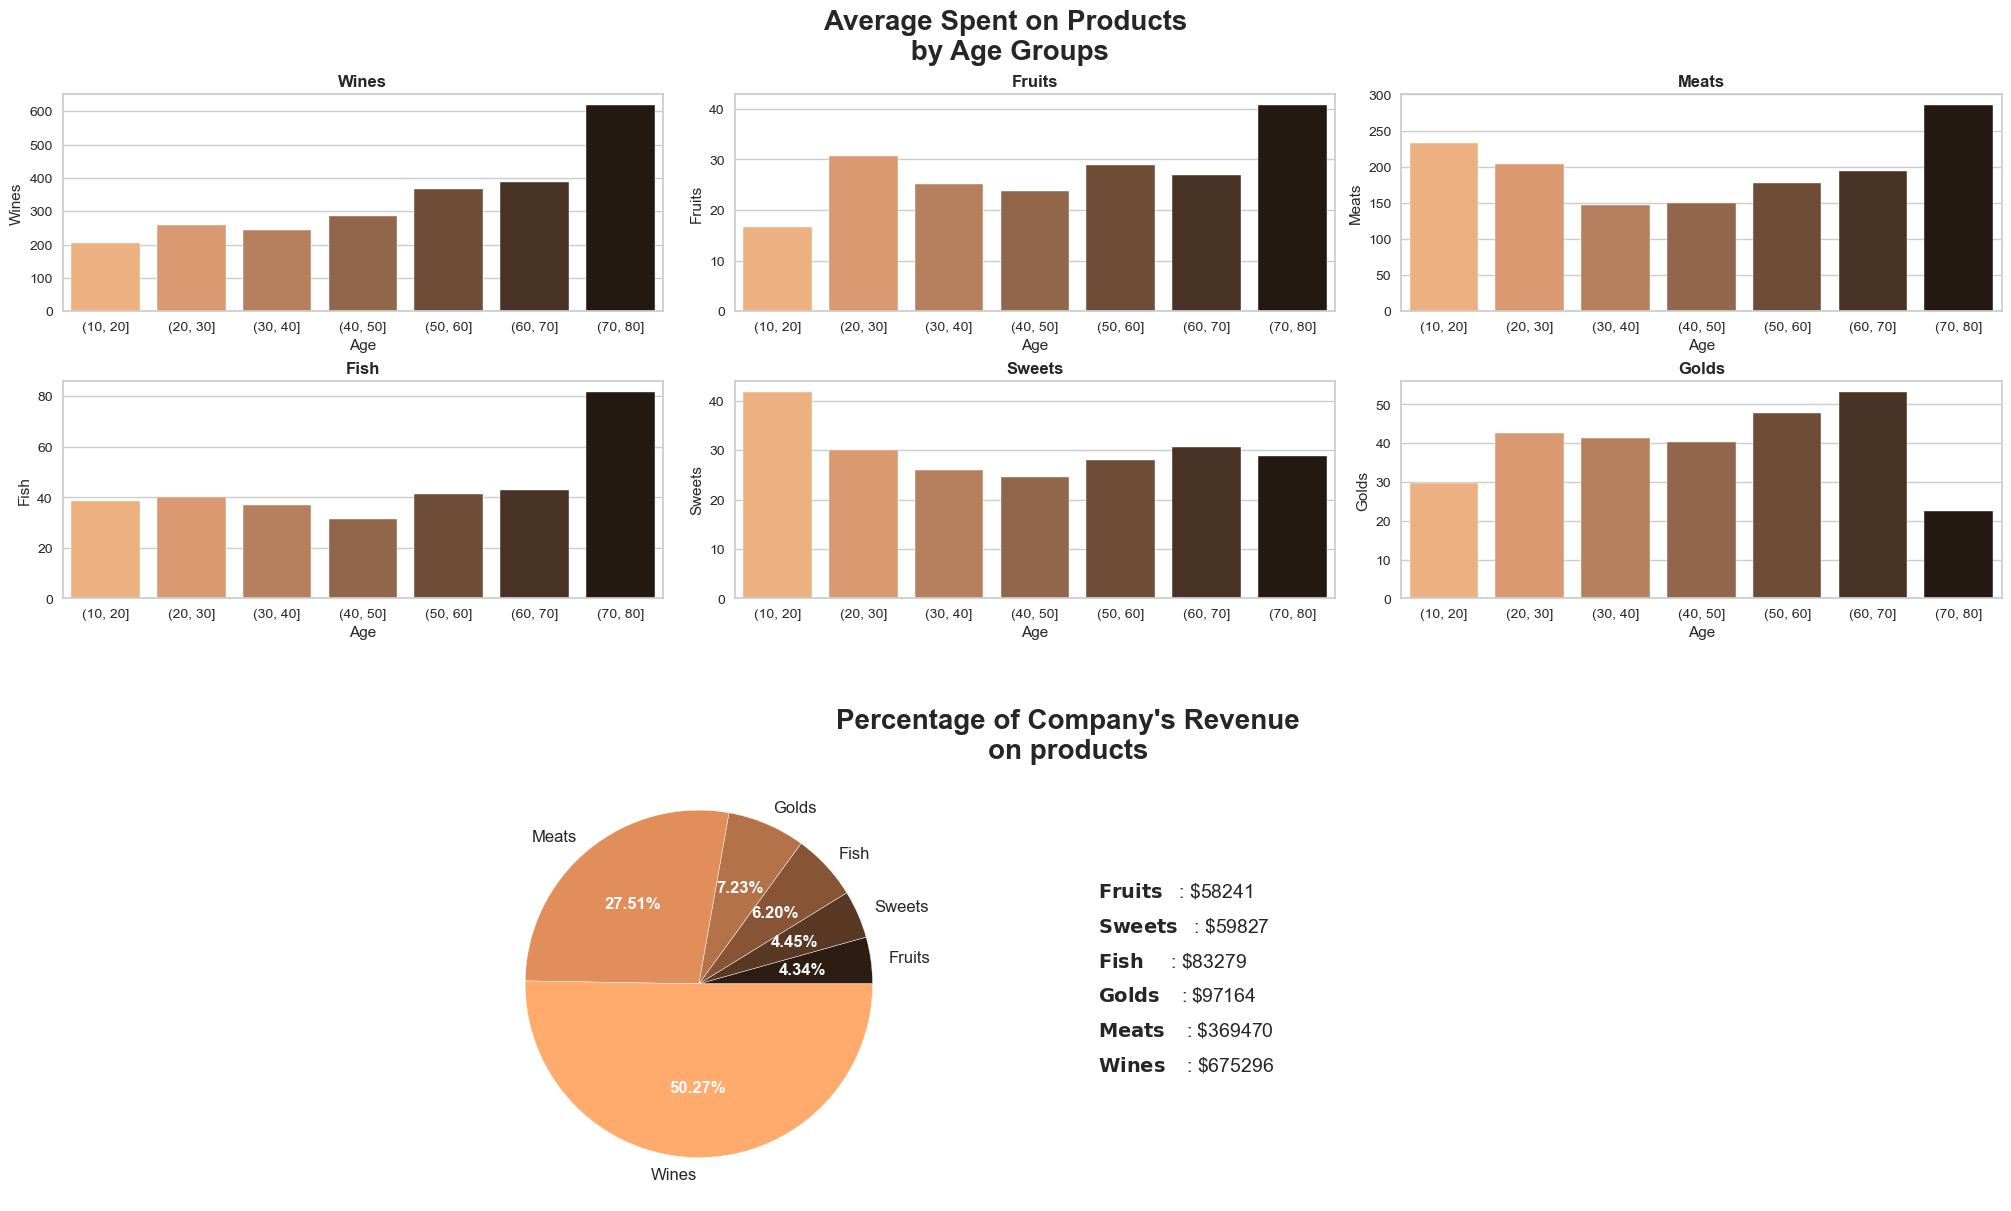

In [47]:
fig, axes = plt.subplot_mosaic([[0,1,2],[3,4,5],[6,6,7],[6,6,7]],
                                 constrained_layout=True, figsize=(20,12))
fig.suptitle("Average Spent on Products\n by Age Groups", weight='bold', fontsize=20)


# Bar chart
sns.barplot(data=data_new, y='Wines', x=group, palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Wines',weight='bold')

sns.barplot(data=data_new, y='Fruits', x=group, palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Fruits',weight='bold')

sns.barplot(data=data_new, y='Meats', x=group, palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Meats',weight='bold')

sns.barplot(data=data_new, y='Fish', x=group, palette='copper_r', ci=None, ax=axes[3])
axes[3].set_title('Fish',weight='bold')

sns.barplot(data=data_new, y='Sweets', x=group, palette='copper_r', ci=None, ax=axes[4])
axes[4].set_title('Sweets',weight='bold')

sns.barplot(data=data_new, y='Golds', x=group, palette='copper_r', ci=None, ax=axes[5])
axes[5].set_title('Golds',weight='bold')

#Pie Chart
data = data_new[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']].sum().sort_values()

palette = sns.color_palette('copper')
wedges, texts, autotexts = axes[6].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axes[6].set_title("\n\nPercentage of Company's Revenue\non products", weight='bold', fontsize=20, x=1.35)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axes[6].text(2.3, 0.5-0.2*i, r"$\bf{" + name + "}$" + "\t:" + " \$" + str(value), fontsize=14)

axes[7].axis('off')

(0.0, 1.0, 0.0, 1.0)

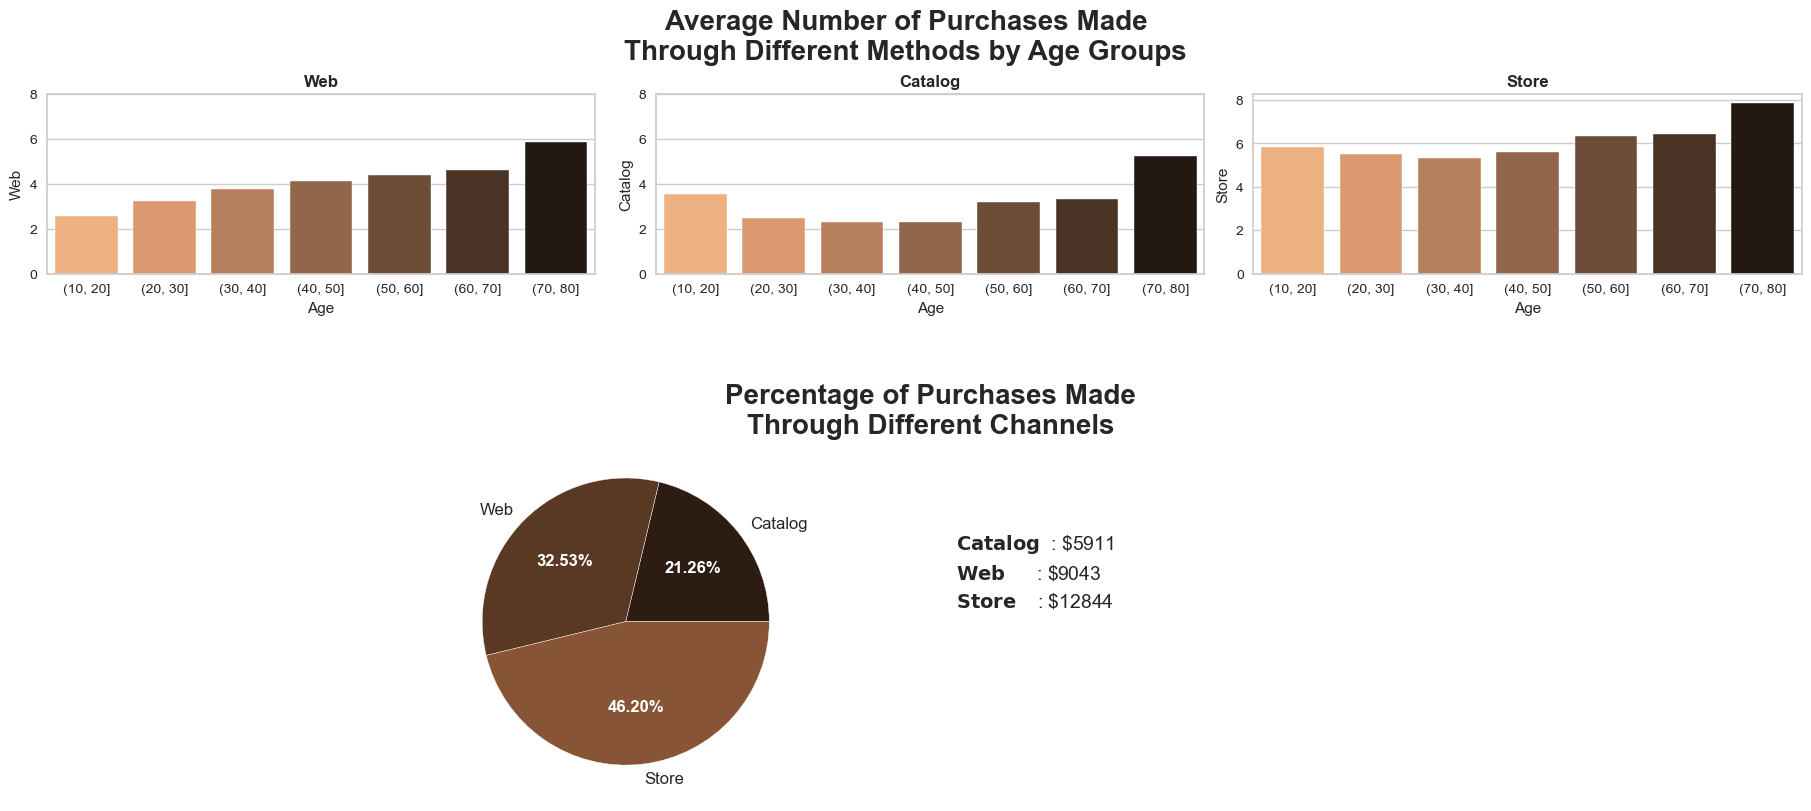

In [49]:
# 2. Purchases made through different channels by age groups and percentage of each channels
fig, axes = plt.subplot_mosaic([[0,1,2], [3,3,4], [3,3,4]],
                               constrained_layout=True, figsize=(18,8))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Age Groups", weight='bold', fontsize=20)

custom_ylim = (0, 8)
plt.setp(axes[0], ylim=custom_ylim)
plt.setp(axes[1], ylim=custom_ylim)

# Bar plot
sns.barplot(data=data_new, x=group, y='Web', palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Web', weight='bold')
sns.barplot(data=data_new, x=group, y='Catalog', palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Catalog', weight='bold')
sns.barplot(data=data_new, x=group, y='Store', palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Store', weight='bold')

# Pie chart
data = data_new[['Web', 'Catalog', 'Store']].sum().sort_values()

palette = sns.color_palette('copper')
wedges, texts, autotexts = axes[3].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axes[3].set_title('\n\nPercentage of Purchases Made\nThrough Different Channels', weight='bold', fontsize=20, x=1.35)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axes[3].text(2.3, 0.5-0.2*i, r"$\bf{" + name + "}$" + "\t:" + " \$" + str(value), fontsize=14)

axes[4].axis('off')

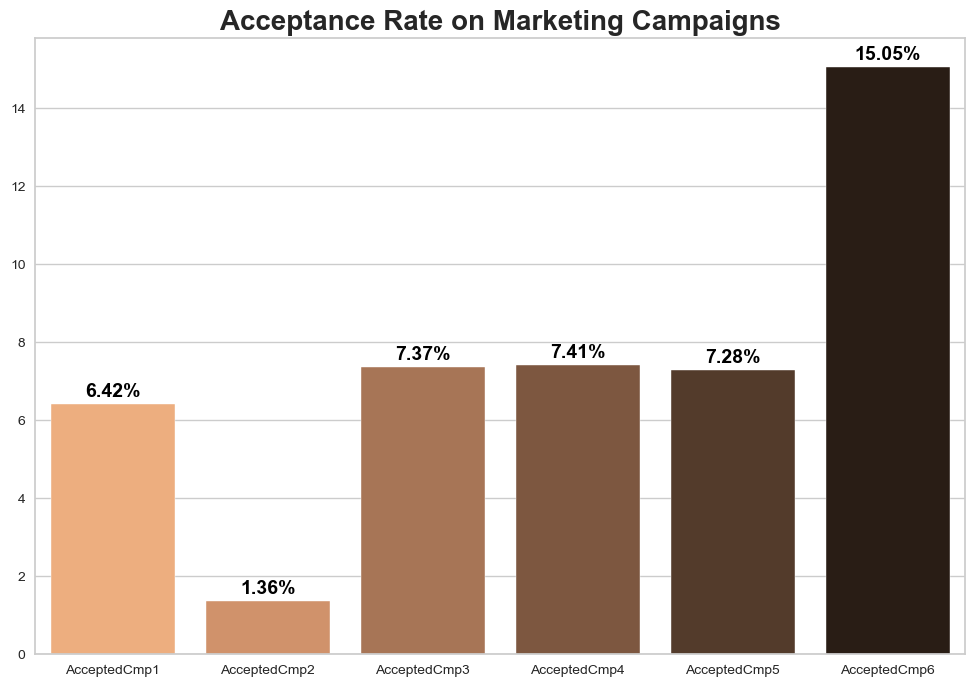

In [51]:
# 3. How do clients react to Mkt Campaigns
data_new.rename(columns={'Response':'AcceptedCmp6'}, inplace=True)

data = data_new.sum()[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']]*100/len(data_new)

plt.figure(figsize=(12,8))
sns.barplot(data=data, palette='copper_r', ci=None)
plt.title('Acceptance Rate on Marketing Campaigns', weight='bold', fontsize=20)

for i, v in enumerate (data.values):
    plt.text(i, v+0.2, f'{v:.2f}%',weight='bold', ha='center', color='black', fontsize=14)


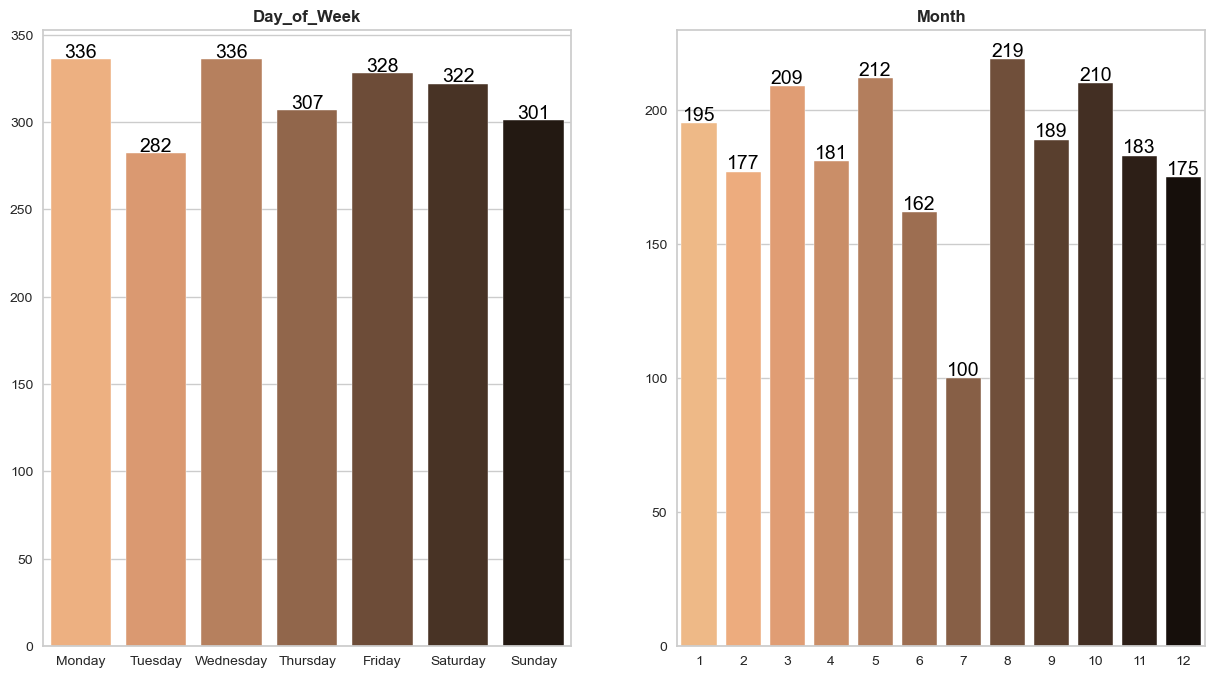

In [53]:
# 4. Which days or months of the year do clients have the tendency to go shopping

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_counts = data_new['Dayofweek'].value_counts().reindex(ordered_days)
month_counts = data_new['Month'].value_counts().sort_index()

sns.barplot(x=day_counts.index, y=day_counts.values, palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Day_of_Week', weight='bold')

for i, v in enumerate(day_counts.values):
    axes[0].text(i, v+1, str(v),ha='center', color='black', fontsize=14)
    axes[0].set_xlabel('') 
    
sns.barplot(x=month_counts.index, y=month_counts.values, palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Month', weight='bold')

for i, v in enumerate(month_counts.values):
    axes[1].text(i, v+1, str(v), ha='center', color='black', fontsize=14)
    axes[1].set_xlabel('')

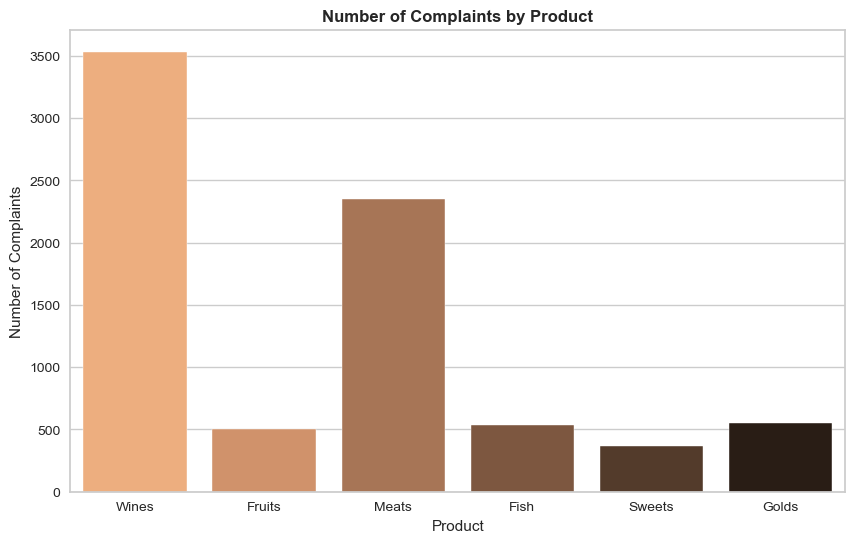

In [55]:
complaints_only = data_new[data_new['Complain'] == 1]
products = ['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Golds']
complaint_counts = complaints_only[products].sum()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=complaint_counts.index, y=complaint_counts.values, palette='copper_r', ax=ax)
ax.set_title('Number of Complaints by Product', weight='bold')
ax.set_ylabel('Number of Complaints')
ax.set_xlabel('Product')
plt.show()

In [57]:
# Data Processing

In [59]:
# Handle categories values 
from pandas import get_dummies

obj_value = data_new.select_dtypes(exclude=[np.number]).columns

dummies = get_dummies(data_new[obj_value], drop_first=True)
data_final = pd.concat([data_new,dummies], axis=1)
data_final.drop(obj_value, axis=1, inplace=True)
data_final.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meats,Fish,Sweets,Golds,...,Year,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partner,Dayofweek_Monday,Dayofweek_Saturday,Dayofweek_Sunday,Dayofweek_Thursday,Dayofweek_Tuesday,Dayofweek_Wednesday
0,58138.0,0,0,58,635,88,546,172,88,88,...,2012,False,False,False,False,False,False,False,True,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,2014,False,False,False,False,True,False,False,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,2013,False,False,True,False,False,False,False,False,True
3,26646.0,1,0,26,11,4,20,10,3,5,...,2014,False,False,True,True,False,False,False,False,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,2014,True,False,True,False,False,True,False,False,False


In [61]:
# Standardize all values 
scaler = StandardScaler()
scaled = scaler.fit_transform(data_final)

data_final_scaled = pd.DataFrame(scaled, columns=data_final.columns)
data_final_scaled.head()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meats,Fish,Sweets,Golds,...,Year,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partner,Dayofweek_Monday,Dayofweek_Saturday,Dayofweek_Sunday,Dayofweek_Thursday,Dayofweek_Tuesday,Dayofweek_Wednesday
0,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,...,-1.499086,-0.944572,-0.158187,-1.349603,-0.423207,-0.412759,-0.396874,-0.401441,2.616099,-0.423207
1,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,...,1.417341,-0.944572,-0.158187,-1.349603,-0.423207,2.422719,-0.396874,-0.401441,-0.382249,-0.423207
2,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,...,-0.040872,-0.944572,-0.158187,0.740959,-0.423207,-0.412759,-0.396874,-0.401441,-0.382249,2.362908
3,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,...,1.417341,-0.944572,-0.158187,0.740959,2.362908,-0.412759,-0.396874,-0.401441,-0.382249,-0.423207
4,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,...,1.417341,1.058681,-0.158187,0.740959,-0.423207,-0.412759,2.519690,-0.401441,-0.382249,-0.423207


In [63]:
#Clustering

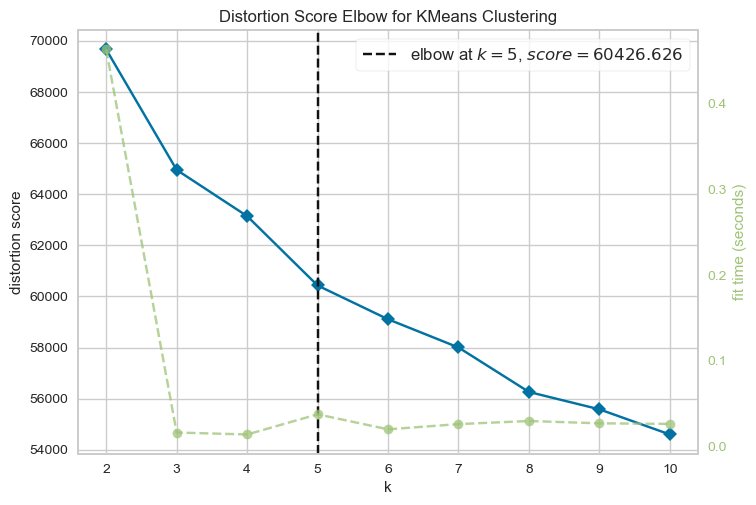

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
elbow =KElbowVisualizer(KMeans(random_state=123), k=10)
elbow.fit(data_final_scaled)
elbow.show()

In [67]:
model = KMeans(n_clusters=5, random_state=123)
yhat = model.fit_predict(data_final_scaled)
data_new['Cluster'] = yhat

<Axes: xlabel='Cluster', ylabel='count'>

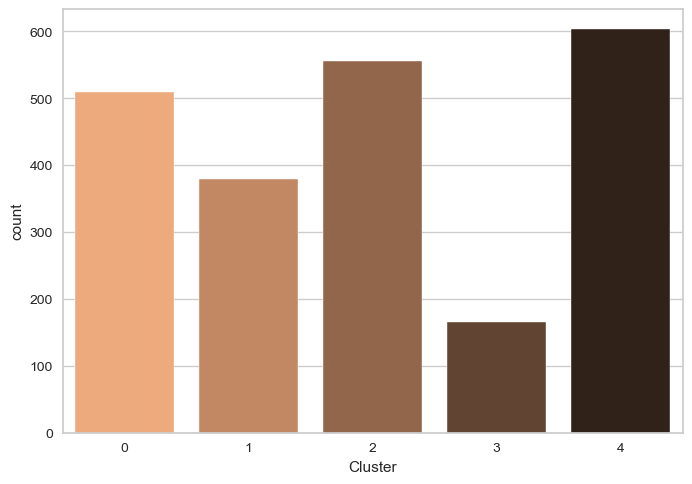

In [69]:
sns.countplot(data=data_new, x='Cluster', palette='copper_r')

In [71]:
# Customer Profiling

<Axes: label='2', xlabel='Cluster', ylabel='Total_spent'>

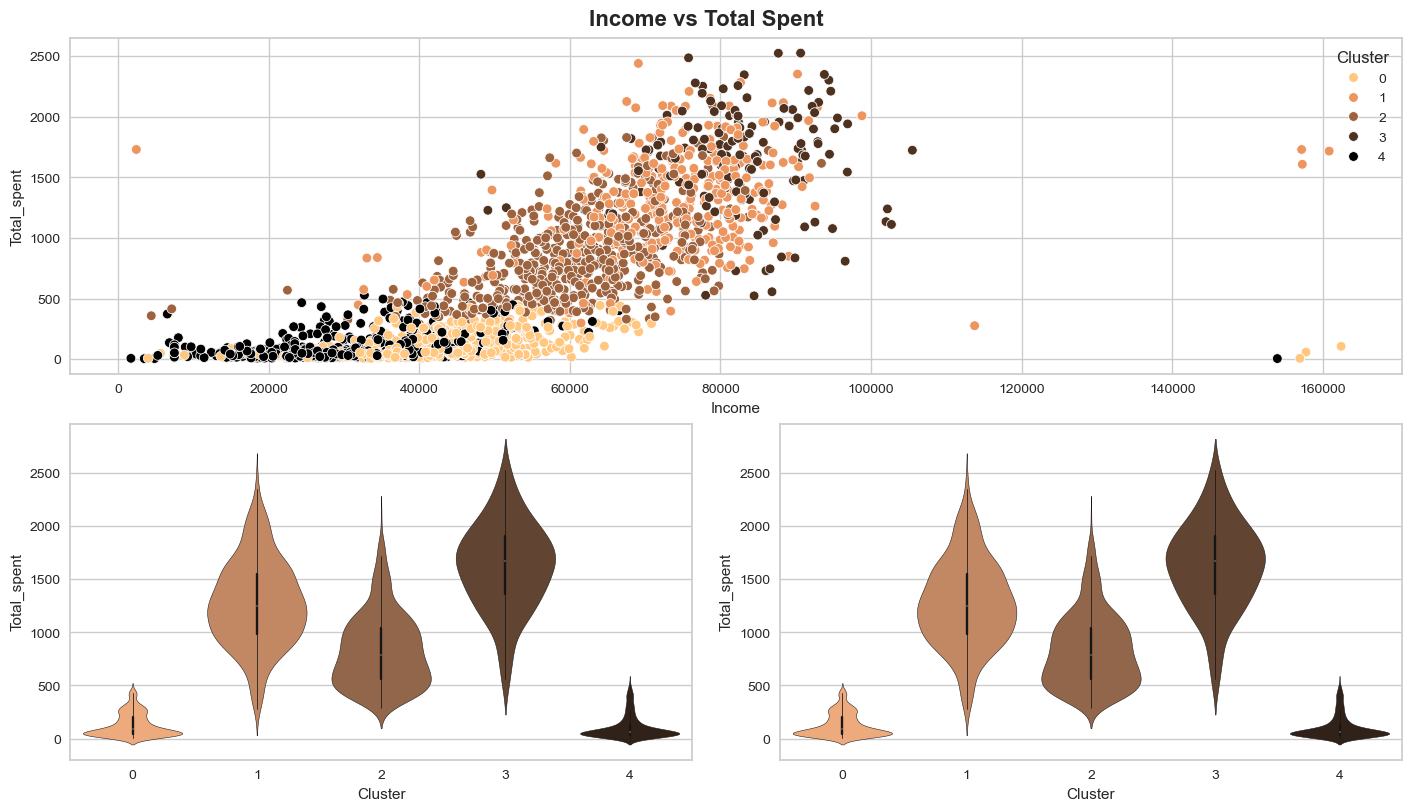

In [75]:
fig, axes = plt.subplot_mosaic([[0,0],[1,2]], constrained_layout=True, figsize=(14,8))
fig.suptitle('Income vs Total Spent', weight='bold', fontsize=16)

sns.scatterplot(data=data_new, x='Income', y='Total_spent', hue='Cluster', palette='copper_r', ax=axes[0])
sns.violinplot(data=data_new, x='Cluster', y='Total_spent', palette='copper_r', ax=axes[1])
sns.violinplot(data=data_new, x='Cluster', y='Total_spent', palette='copper_r', ax=axes[2])

In [79]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2212 non-null   object 
 1   Marital_Status     2212 non-null   object 
 2   Income             2212 non-null   float64
 3   Kidhome            2212 non-null   int64  
 4   Teenhome           2212 non-null   int64  
 5   Recency            2212 non-null   int64  
 6   Wines              2212 non-null   int64  
 7   Fruits             2212 non-null   int64  
 8   Meats              2212 non-null   int64  
 9   Fish               2212 non-null   int64  
 10  Sweets             2212 non-null   int64  
 11  Golds              2212 non-null   int64  
 12  NumDealsPurchases  2212 non-null   int64  
 13  Web                2212 non-null   int64  
 14  Catalog            2212 non-null   int64  
 15  Store              2212 non-null   int64  
 16  NumWebVisitsMonth  2212 non-n

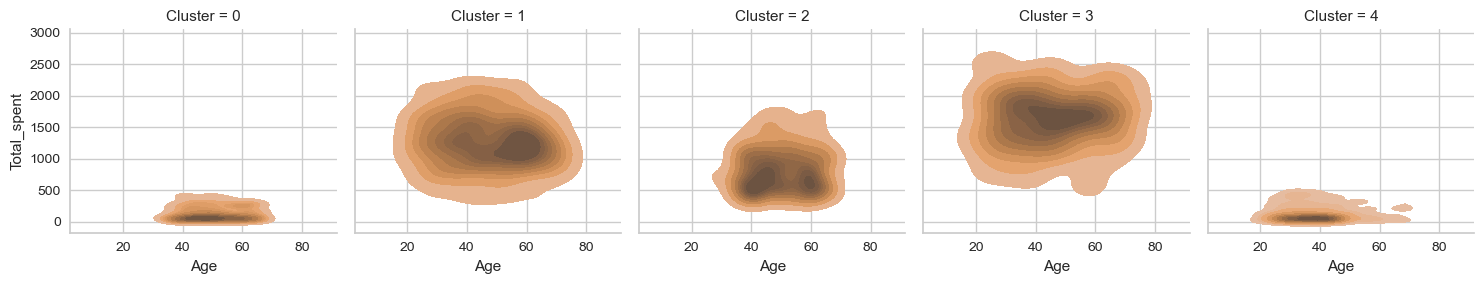

In [77]:
g = sns.FacetGrid(data=data_new, col='Cluster')
g.map(sns.kdeplot, 'Age', 'Total_spent', color='#c08552', fill=True)

Text(0.6, 4000, '0: Non Parent\n1: Parent')

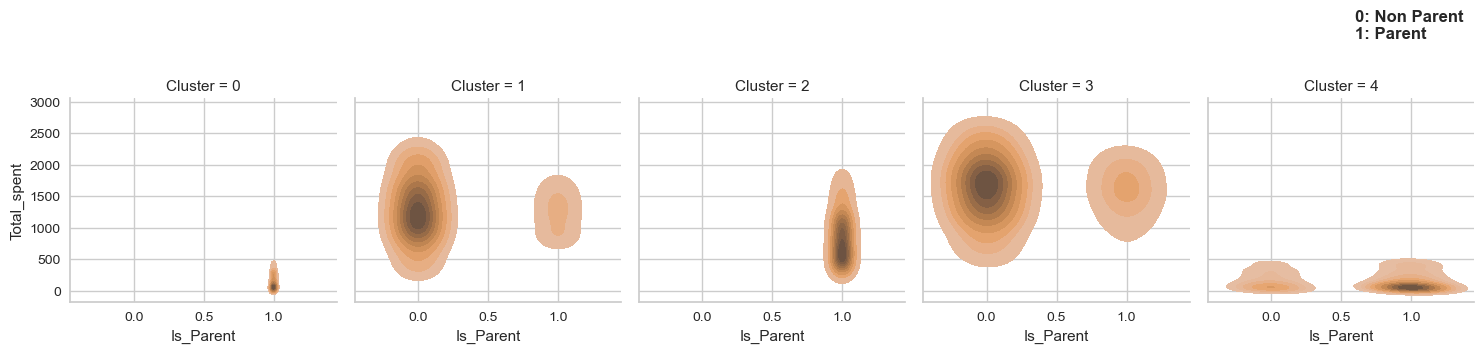

In [91]:
g = sns.FacetGrid(data=data_new, col='Cluster')
g.map(sns.kdeplot,'Is_Parent', 'Total_spent', color='#c08552', fill=True)
plt.text(0.6,4000, '0: Non Parent\n1: Parent', weight='bold', fontsize=12)

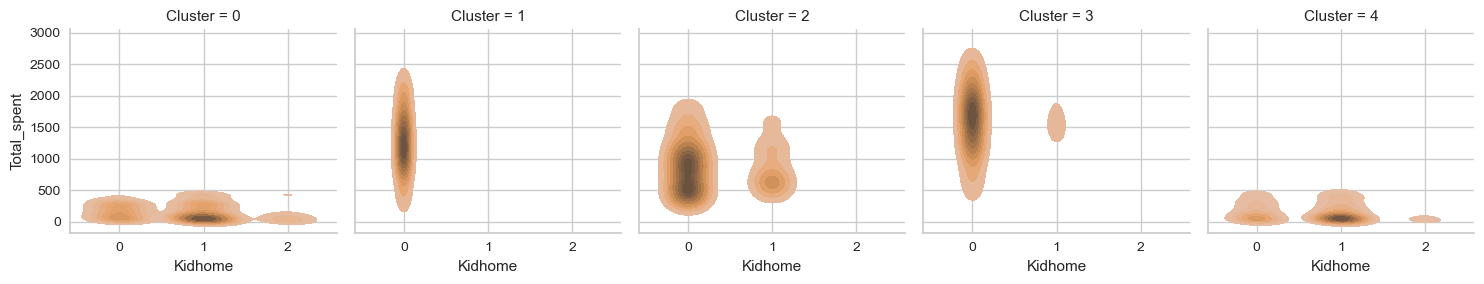

In [93]:
g = sns.FacetGrid(data=data_new, col='Cluster')
g.map(sns.kdeplot, 'Kidhome', 'Total_spent', color='#c08552', fill=True)

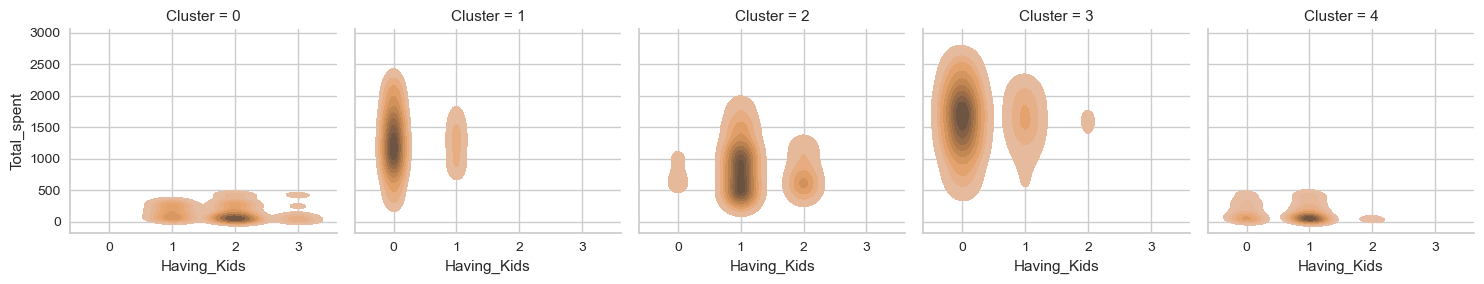

In [99]:
g = sns.FacetGrid(data=data_new, col='Cluster')
g.map(sns.kdeplot, 'Having_Kids', 'Total_spent', color='#c08552', fill=True)

In [101]:
# Transform categorical values to binary for Visualizations
le = LabelEncoder()

for obj in obj_value[:-1]:
    trans = le.fit_transform(data_new[obj])
    data_new[obj] = trans

Text(0.6, 4000, '0: Graduate\n1: Postgraduate\n2: Undergraduate')

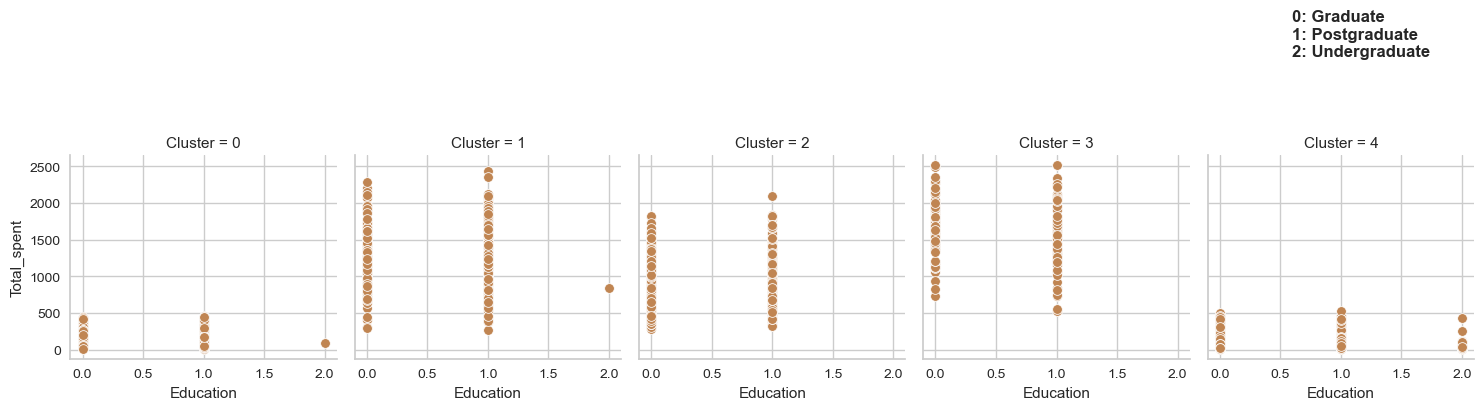

In [109]:
g = sns.FacetGrid(data=data_new, col='Cluster')
g.map(sns.scatterplot,'Education', 'Total_spent', color='#c08552')
plt.text(0.6,4000, '0: Graduate\n1: Postgraduate\n2: Undergraduate', weight='bold', fontsize=12)

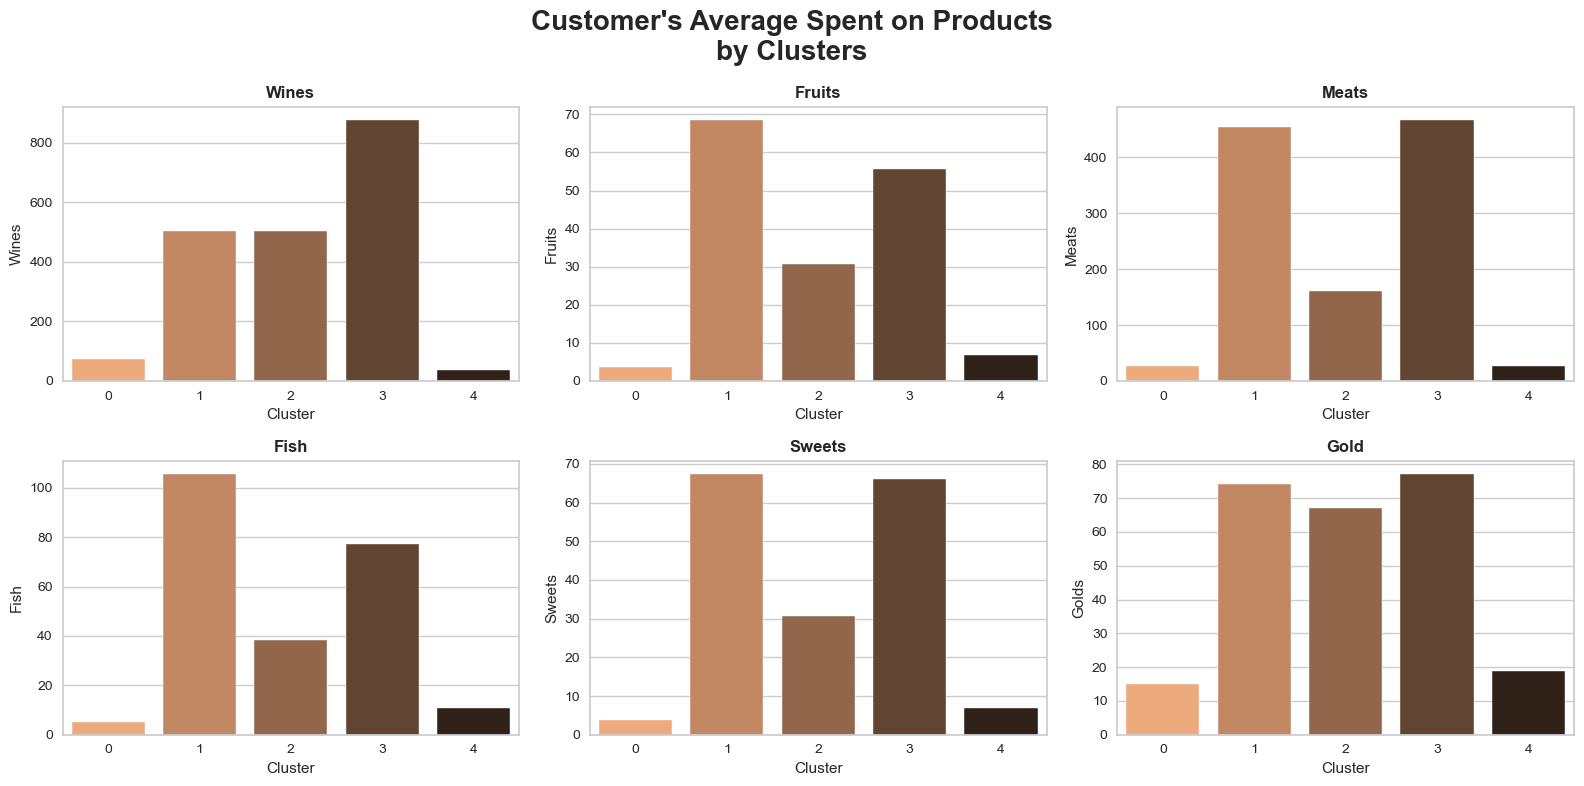

In [111]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
fig.suptitle("Customer's Average Spent on Products\nby Clusters", weight='bold', fontsize=20)
axes = axes.flatten()

sns.barplot(data=data_new, x='Cluster', y='Wines', palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Wines', weight='bold')
sns.barplot(data=data_new, x='Cluster', y='Fruits', palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Fruits', weight='bold')
sns.barplot(data=data_new, x='Cluster', y='Meats', palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Meats', weight='bold')
sns.barplot(data=data_new, x='Cluster', y='Fish', palette='copper_r', ci=None, ax=axes[3])
axes[3].set_title('Fish', weight='bold')
sns.barplot(data=data_new, x='Cluster', y='Sweets', palette='copper_r', ci=None, ax=axes[4])
axes[4].set_title('Sweets', weight='bold')
sns.barplot(data=data_new, x='Cluster', y='Golds', palette='copper_r', ci=None, ax=axes[5])
axes[5].set_title('Gold', weight='bold')

plt.tight_layout()

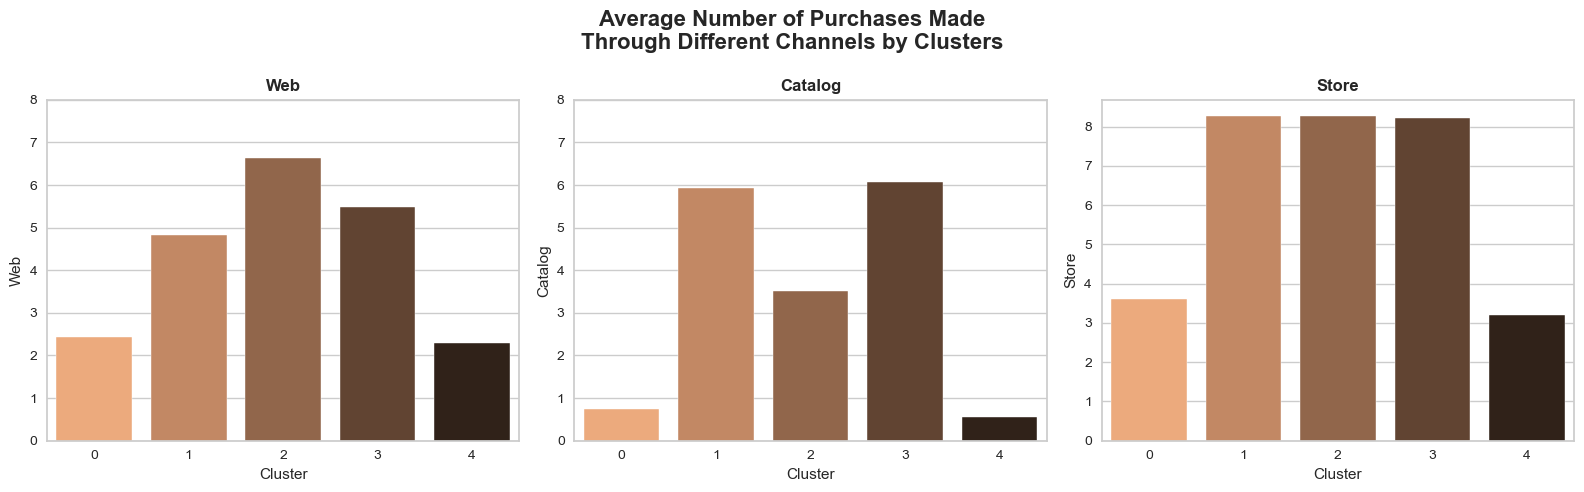

In [115]:
fig, axes = plt.subplots(1,3, figsize=(16,5))
fig.suptitle("Average Number of Purchases Made\nThrough Different Channels by Clusters", weight='bold', fontsize=16)
axes = axes.flatten()

custom_ylim = (0, 8)
plt.setp(axes[0], ylim=custom_ylim)
plt.setp(axes[1], ylim=custom_ylim)

# Bar plot
sns.barplot(data=data_new, x='Cluster', y='Web', palette='copper_r', ci=None, ax=axes[0])
axes[0].set_title('Web', weight='bold')
sns.barplot(data=data_new, x='Cluster', y='Catalog', palette='copper_r', ci=None, ax=axes[1])
axes[1].set_title('Catalog', weight='bold')
sns.barplot(data=data_new, x='Cluster', y='Store', palette='copper_r', ci=None, ax=axes[2])
axes[2].set_title('Store', weight='bold')

plt.tight_layout()

<Axes: title={'center': 'Average Number of Purchases Made with a Discount\nby Clusters'}, xlabel='Cluster', ylabel='NumDealsPurchases'>

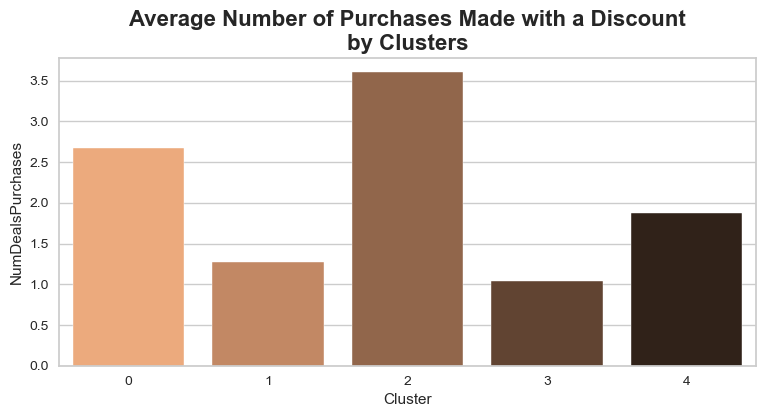

In [117]:
plt.figure(figsize=(9,4))
plt.title('Average Number of Purchases Made with a Discount\nby Clusters', weight='bold', fontsize=16)
sns.barplot(data=data_new, x='Cluster', y='NumDealsPurchases', ci=None, palette='copper_r')